In [1]:
from input_pipeline import nmf_obj
import pandas as pd
import numpy as np
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import w2v_clean_filter as cft
from sklearn.cluster import KMeans

In [2]:
import gensim
import gensim.downloader as api
google_vec_file = api.load("word2vec-google-news-300", return_path=True)

In [3]:
reviews = pd.read_csv('../raw_data/deceptive-opinion.csv')

In [4]:
WE_fake_clean = cft.main_clean(reviews)

In [34]:
WE_fake_clean

text
0     stay night getaway famili thursday tripl rate ...
1     tripl rate upgrad view breakfast voucher great...
2     littl late final review past month dear friend...
3     deliv front spacious room help staff locat ave...
4     high floor away elev pleasantli function clean...
...                                                 ...
1595  problem intercontinent onlin site server error...
1596  amalfi beauti websit interior wife key interne...
1597  intercontinent magnific mile outsid pretti mag...
1598  palmer hous hilton look good pictur outsid act...
1599  chicagoan appal amalfi luxuri hospit experi de...

[1600 rows x 1 columns]

In [6]:
#WE_fake_clean.to_csv('../pickles/WE_fake_clean.csv')

In [35]:
#WE_fake_clean = pd.read_csv('../pickles/WE_fake_clean.csv', index_col=0)

# cluster center notes

each list is a cluster; within the individual cluster, the number is the average value of that topic within that cluster. look for biggest number in the cluster; on average where does that lie in distribution compared to others.

In [36]:
WE_tokenized = [gensim.utils.simple_preprocess(d) for d in WE_fake_clean['text']]

In [37]:
WE_tokenized

[['stay',
  'night',
  'getaway',
  'famili',
  'thursday',
  'tripl',
  'rate',
  'steal',
  'floor',
  'complet',
  'plasma',
  'bose',
  'stereo',
  'voss',
  'evian',
  'water',
  'gorgeou',
  'bathroom',
  'tub',
  'fine',
  'concierg',
  'help',
  'beat',
  'locat',
  'flaw',
  'breakfast',
  'pricey',
  'servic',
  'kid',
  'adult',
  'friday',
  'morn',
  'tabl',
  'restaur',
  'food',
  'good',
  'worth',
  'wait',
  'return',
  'heartbeat',
  'gem'],
 ['tripl',
  'rate',
  'upgrad',
  'view',
  'breakfast',
  'voucher',
  'great',
  'view',
  'river',
  'lake',
  'wrigley',
  'bldg',
  'tribun',
  'bldg',
  'major',
  'restaur',
  'shop',
  'attract',
  'distanc',
  'larg',
  'comfort',
  'bed'],
 ['littl',
  'late',
  'final',
  'review',
  'past',
  'month',
  'dear',
  'friend',
  'stay',
  'hyatt',
  'regenc',
  'late',
  'octob',
  'night',
  'friend',
  'husband',
  'town',
  'perfect',
  'imo',
  'easi',
  'check',
  'check',
  'love',
  'clean',
  'comfort',
  'room',

In [9]:
model = gensim.models.KeyedVectors.load_word2vec_format(google_vec_file, binary=True)

# Testing sentence level

In [10]:
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw

In [39]:
sent_vect = []
for sentence in WE_tokenized:
    sent_vect.append(sent_vectorizer(sentence, model))

In [40]:
sent_vect

[array([-0.01858237,  0.04436907, -0.02635978,  0.08044259, -0.04000942,
         0.05143258,  0.02446464, -0.07302944,  0.06878825,  0.11068464,
        -0.0774449 , -0.13450688,  0.03250645, -0.00467834, -0.03545096,
         0.089522  ,  0.0287323 ,  0.11172976,  0.05775877, -0.04503109,
         0.02807094,  0.02347804,  0.05127127, -0.01515241, -0.01174496,
         0.03564715, -0.05574602,  0.10031564,  0.02888184, -0.05177176,
        -0.05466527,  0.00707267, -0.02855225, -0.06533378, -0.09583914,
        -0.0675293 , -0.00233329, -0.02452654, -0.03487026,  0.01567557,
         0.03362514, -0.06990258,  0.16508178,  0.00351824, -0.00521742,
        -0.0414978 , -0.06515285,  0.037517  , -0.02072144,  0.05440674,
        -0.02534703,  0.07401995,  0.03901106, -0.01102469, -0.00468576,
        -0.04749211, -0.02025844, -0.03548235,  0.01462904, -0.04371687,
        -0.04263393,  0.04799107, -0.07957938, -0.00218784,  0.05538215,
        -0.07867955, -0.13063529, -0.03301915, -0.0

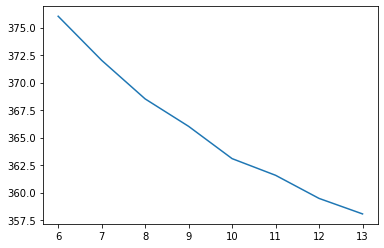

In [42]:
def elbow_test(nmf):
    sum_square_dist = []
    k_range = [x for x in range(6,14)]
    for k in k_range:
        km = KMeans(n_clusters=k, random_state=444)
        km.fit(nmf)
        sum_square_dist.append(km.inertia_)
    return k_range, sum_square_dist

sent_k, sent_inertia = elbow_test(sent_vect)

plt.plot(sent_k, sent_inertia)

In [26]:
def kmeans_cluster_range(data, klow, khigh):
    k_df = pd.DataFrame()
    for k in range(klow, khigh+1):
        km = KMeans(n_clusters=k, random_state=444)
        km.fit_predict(data)
        k_df[k] = km.labels_
    return k_df

In [31]:
reviews

deceptive             hotel  polarity       source  \
0      truthful            conrad  positive  TripAdvisor   
1      truthful             hyatt  positive  TripAdvisor   
2      truthful             hyatt  positive  TripAdvisor   
3      truthful              omni  positive  TripAdvisor   
4      truthful             hyatt  positive  TripAdvisor   
...         ...               ...       ...          ...   
1595  deceptive  intercontinental  negative        MTurk   
1596  deceptive            amalfi  negative        MTurk   
1597  deceptive  intercontinental  negative        MTurk   
1598  deceptive            palmer  negative        MTurk   
1599  deceptive            amalfi  negative        MTurk   

                                                   text  
0     We stayed for a one night getaway with family ...  
1     Triple A rate with upgrade to view room was le...  
2     This comes a little late as I'm finally catchi...  
3     The Omni Chicago really delivers on all fronts...  
4     I asked for a high floor away from the elevato...  
...                                                 ...  
1595  Problems started when I booked the InterContin...  
1596  The Amalfi Hotel has a beautiful website and i...  
1597  The Intercontinental Chicago Magnificent Mile ...  
1598  The Palmer House Hilton, while it looks good i...  
1599  As a former Chicagoan, I'm appalled at the Ama...  

[1600 rows x 5 columns]

In [43]:
sent_vect_df = kmeans_cluster_range(sent_vect,8, 11)
sent_vect_df['target'] = reviews['deceptive']

In [44]:
sent_vect_df

8  9  10  11     target
0     5  0   8   0   truthful
1     7  7   1   2   truthful
2     4  7   4   7   truthful
3     3  8   5   1   truthful
4     2  1   6   3   truthful
...  .. ..  ..  ..        ...
1595  1  8   2   1  deceptive
1596  4  2   2   1  deceptive
1597  3  8   5   1  deceptive
1598  4  2   3   7  deceptive
1599  4  2   3   7  deceptive

[1600 rows x 5 columns]

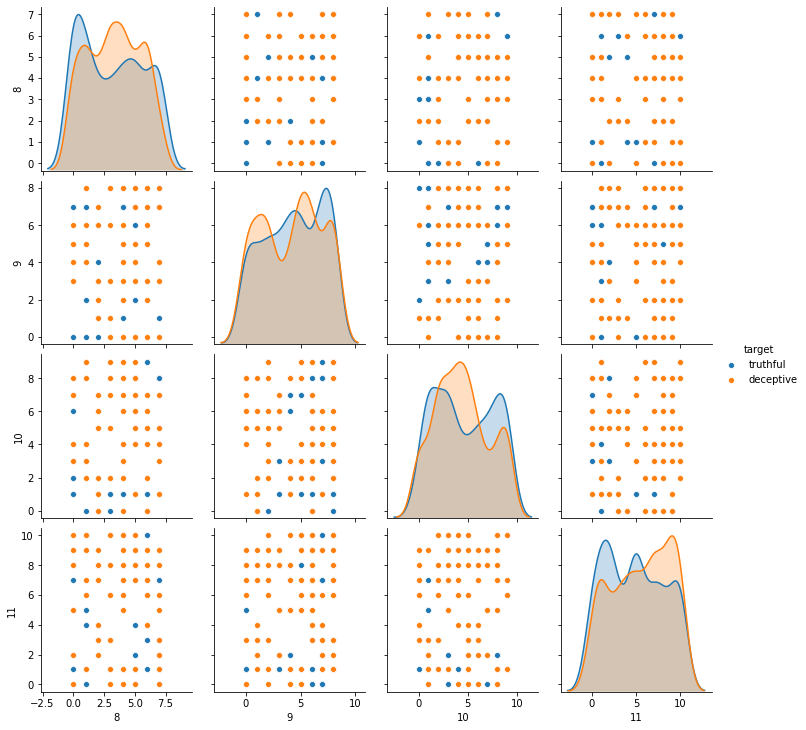

In [45]:
sns.pairplot(sent_vect_df, hue='target')

In [64]:
def kmeans_cluster(k, data):
    km = KMeans(n_clusters=k, random_state=444)
    km.fit_predict(data)
    return km

# Word level clustering

In [46]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in word2vec_model.vocab]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return []

In [47]:
test = []
for docs in WE_tokenized:
    test.append(get_mean_vector(model, docs))

1600

In [80]:
len(test)

1600

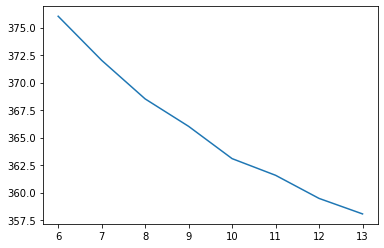

In [48]:
x_k, y_inertia = elbow_test(test)

plt.plot(x_k, y_inertia)

In [49]:
word_vect_df = kmeans_cluster_range(test,8,14)
word_vect_df['target'] = reviews['deceptive']

In [51]:
word_vect_df

8  9  10  11  12  13  14     target
0     5  0   8   0   0   8   0   truthful
1     7  7   1   2   2   1   7   truthful
2     4  7   4   7   7  11   2   truthful
3     3  8   5   1   1   5  10   truthful
4     2  1   6   3   3   6  11   truthful
...  .. ..  ..  ..  ..  ..  ..        ...
1595  1  8   2   1   1  12  10  deceptive
1596  4  2   2   1   1   2   8  deceptive
1597  3  8   5   1   1  12  10  deceptive
1598  4  2   3   7   7   9   2  deceptive
1599  4  2   3   7   7   9   5  deceptive

[1600 rows x 8 columns]

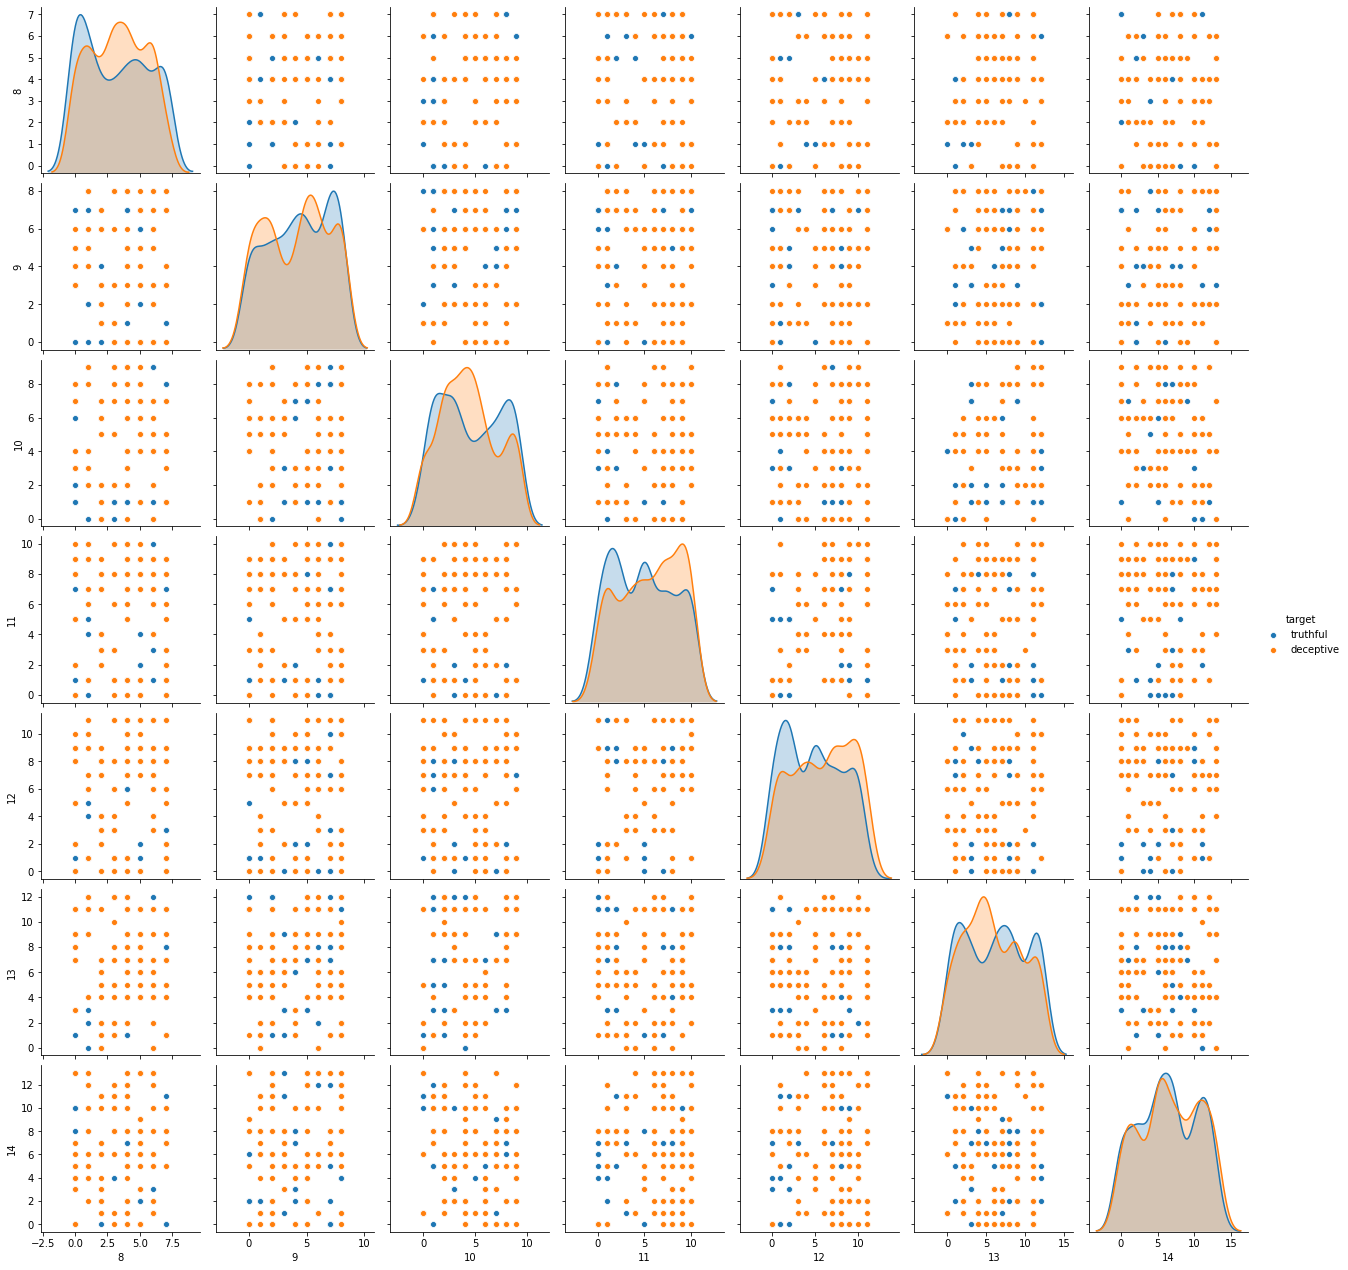

In [50]:
sns.pairplot(word_vect_df, hue='target')

In [63]:
word_km = kmeans_cluster(10, test)
word_km.labels_

array([8, 1, 4, ..., 5, 3, 3], dtype=int32)

In [ ]:
sent_vect_ct = pd.crosstab(index=sent_vect_df[11], columns=sent_vect_df['target'])
sent_vect_ct['%_deceptive'] = sent_vect_ct['deceptive'] / (sent_vect_ct['deceptive']+sent_vect_ct['truthful'])

In [ ]:
sent_vect_ct

# Word Level

In [53]:
from nltk.cluster import KMeansClusterer
import nltk

In [54]:
NUM_CLUSTERS=10
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(test, assign_clusters=True)

In [66]:
nltk_cluster = reviews.copy()
nltk_cluster['cluster'] = assigned_clusters
nltk_cluster['predict'] = nltk_cluster['cluster'].map({0:0,
                                                       1:1,
                                                       2:0,
                                                       3:0,
                                                       4:0,
                                                       5:1,
                                                       6:0,
                                                       7:0,
                                                       8:1,
                                                       9:1})
nltk_cluster['deceptive'] = nltk_cluster['deceptive'].map({'truthful':0, 'deceptive':1})

In [100]:
nltk_cluster.cluster.value_counts()

6    296
4    245
3    178
2    151
1    143
9    139
0    138
8    123
7     98
5     89
Name: cluster, dtype: int64

In [166]:
nltk_cluster[nltk_cluster['cluster'] == 6]

deceptive             hotel  polarity       source  \
2             0             hyatt  positive  TripAdvisor   
5             0              omni  positive  TripAdvisor   
12            0             hyatt  positive  TripAdvisor   
21            0          fairmont  positive  TripAdvisor   
26            0          fairmont  positive  TripAdvisor   
...         ...               ...       ...          ...   
1586          1            palmer  negative        MTurk   
1592          1           allegro  negative        MTurk   
1594          1  intercontinental  negative        MTurk   
1598          1            palmer  negative        MTurk   
1599          1            amalfi  negative        MTurk   

                                                   text  cluster  predict  
2     This comes a little late as I'm finally catchi...        6        0  
5     I stayed at the Omni for one night following a...        6        0  
12    We arrived at 10:30 am on a Friday, and they h...        6        0  
21    We went to Chicago to see an exhibit at the Ar...        6        0  
26    Simply a nice place to stay... I had a great d...        6        0  
...                                                 ...      ...      ...  
1586  The Hilton family would be outraged after hear...        6        0  
1592  I arrived at the hotel 15 minutes prior to che...        6        0  
1594  We will not be back to this hotel. There are s...        6        0  
1598  The Palmer House Hilton, while it looks good i...        6        0  
1599  As a former Chicagoan, I'm appalled at the Ama...        6        0  

[296 rows x 7 columns]

In [60]:
nltk_ct = pd.crosstab(index=nltk_cluster['cluster'], columns=nltk_cluster['deceptive'])
nltk_ct['%_deceptive'] = nltk_ct['deceptive'] / (nltk_ct['deceptive']+nltk_ct['truthful'])

In [68]:
nltk_cluster.to_pickle('../pickles/WE_hotel_result.pkl')

# Yelp Review Words

In [69]:
yelp_raw_df = pd.read_pickle('../pickles/short_reviews.pkl')

In [111]:
yelp_raw_df['text_cl']

reviewerID   reviewContent flagged text_cl
count                    67019           67019   67019   67019
unique                   35029           66977       2   66852
top     jrMxBHW3SlUGVGYWvPsHWA  Cory approved.       N        
freq                        57               5   58716      35

In [71]:
yelp_tokenized = [gensim.utils.simple_preprocess(d) for d in yelp_raw_df['text_cl']]

In [102]:
yelp = []
for docs in yelp_tokenized:
    yelp.append(get_mean_vector(model, docs))

In [136]:
yelp_WE_df = pd.DataFrame(index=yelp_raw_df.index)

In [138]:
yelp_WE_df['wordvec'] = yelp

In [139]:
yelp_WE_df

wordvec
0      [-0.03914648, 0.042869736, 0.026009163, 0.1034...
1      [-0.035135906, -0.007910411, 0.0040486655, 0.1...
2      [0.006754557, 0.05195109, -0.019804636, 0.1401...
3      [0.0028177132, 0.027327115, 0.008353441, 0.136...
4      [-0.022025386, 0.034902874, 0.021108929, 0.106...
...                                                  ...
67014  [-0.04965428, 0.031282697, -0.007022313, 0.119...
67015  [0.012634277, 0.0373012, -0.04950169, 0.077671...
67016  [-0.004300631, 0.019136868, 0.022362342, 0.079...
67017  [-0.06703427, -0.017074585, 0.049329657, 0.094...
67018  [-0.10543464, 0.010971967, 0.029181985, 0.1627...

[67019 rows x 1 columns]

In [147]:
yelp_final = yelp_WE_df[yelp_WE_df['wordvec'].map(len)==300]

In [148]:
yelp_final['cluster'] = yelp_final['wordvec'].apply(lambda x: kclusterer.classify(x))

<ipython-input-148-b22cbcd677c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_final['cluster'] = yelp_final['wordvec'].apply(lambda x: kclusterer.classify(x))


In [151]:
yelp_final['target'] = yelp_raw_df['flagged']

<ipython-input-151-ca5e506c6f17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_final['target'] = yelp_raw_df['flagged']


In [154]:
yelp_final['predict'] = yelp_final['cluster'].map({0:0,
                                               1:1,
                                               2:0,
                                               3:0,
                                               4:0,
                                               5:1,
                                               6:0,
                                               7:0,
                                               8:1,
                                               9:1})

<ipython-input-154-24146556843d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_final['predict'] = yelp_final['cluster'].map({0:0,


In [157]:
yelp_final['target'] = yelp_final['target'].map({'Y':1,'N':0})

<ipython-input-157-055284f130f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_final['target'] = yelp_final['target'].map({'Y':1,'N':0})


In [158]:
yelp_final

wordvec  cluster  target  \
0      [-0.03914648, 0.042869736, 0.026009163, 0.1034...        3       0   
1      [-0.035135906, -0.007910411, 0.0040486655, 0.1...        3       0   
2      [0.006754557, 0.05195109, -0.019804636, 0.1401...        3       0   
3      [0.0028177132, 0.027327115, 0.008353441, 0.136...        3       0   
4      [-0.022025386, 0.034902874, 0.021108929, 0.106...        2       0   
...                                                  ...      ...     ...   
67014  [-0.04965428, 0.031282697, -0.007022313, 0.119...        3       0   
67015  [0.012634277, 0.0373012, -0.04950169, 0.077671...        1       0   
67016  [-0.004300631, 0.019136868, 0.022362342, 0.079...        0       0   
67017  [-0.06703427, -0.017074585, 0.049329657, 0.094...        3       0   
67018  [-0.10543464, 0.010971967, 0.029181985, 0.1627...        3       0   

       predict  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
67014        0  
67015        1  
67016        0  
67017        0  
67018        0  

[66925 rows x 4 columns]

In [161]:
from sklearn.metrics import confusion_matrix as cm, f1_score

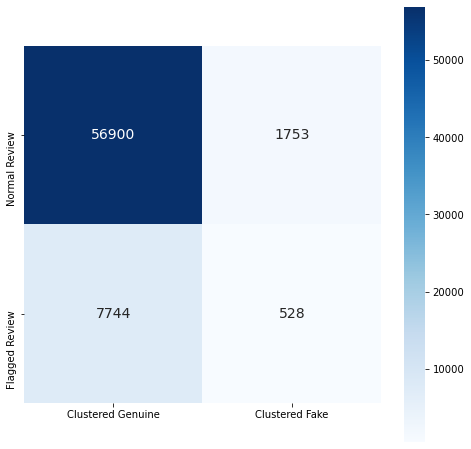

In [165]:
plt.figure(figsize=(8,8))
ylabel = ['Normal Review', 'Flagged Review']
xlabel = ['Clustered Genuine', 'Clustered Fake']
bigram_cm = cm(yelp_final['target'], yelp_final['predict'])
sns.heatmap(bigram_cm, annot=True, fmt='d', xticklabels=xlabel, yticklabels=ylabel,
            annot_kws={'size':14}, cmap='Blues', square=True)
plt.savefig('../ppt/Yelp_WV_CM.png')

In [163]:
f1_score(yelp_final['target'], yelp_final['predict'])

0.10006633184876339